# Data Augmentation

Data augmentation occurs when you create new data based on modifications of existing data. In our case, the data we'll work with will be images. Data augmentation on images would include transformations like:
   * Flipping the image either horizontally or vertically,
   * Rotating the image
   * Zooming in or out the image
   * Cropping the image
   * Varying the color on the image

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import itertools
import shutil
from random import randint
import random
import glob
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [2]:
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
from random import randint
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
train_n = 50

In [4]:
# this function will plot images in the form of a grid with 1 row and 10 columns where images are plac
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [5]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

In [6]:
# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\dog_set')
if os.path.isdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\train1\\dog') is False:
    os.makedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\train1\\dog')
    
    for i in random.sample(glob.glob('dog*'), train_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\train1\\dog')  
os.chdir('../../')

In [7]:
chosen_image = random.choice(os.listdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\train1\\dog\\'))

In [8]:
image_path = 'C:\\Users\\רועי\\data\\dogs-vs-cats\\train1\\dog\\' + chosen_image

In [9]:
assert os.path.isfile(image_path)

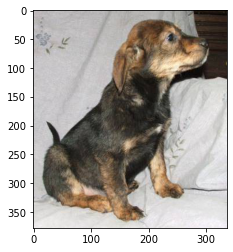

In [10]:
# obtain image
image = np.expand_dims(plt.imread(image_path),0)
plt.imshow(image[0])

In [11]:
# Generate batches of augmented images from this image
aug_iter = gen.flow(image)

In [12]:
# Get 10 samples of augmented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

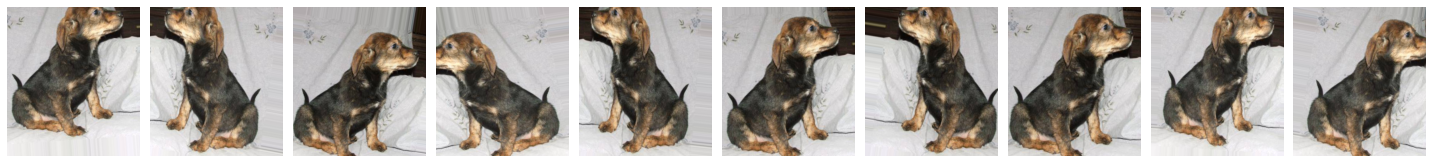

In [13]:
# Augmented images
plotImages(aug_images)

# Save Augmented Data

In [14]:
aug_iter = gen.flow(image, save_to_dir='C:\\Users\\רועי\\data\\dogs-vs-cats\\train1\\dog', save_prefix='aug-image-', save_format='jpeg')

In [15]:
# Delete data from train directories
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\train1\\dog')
for i in random.sample(glob.glob('*'), train_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\dog_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\train1\\dog')
os.chdir('../../')